In [70]:
import numpy as np
import pandas as pd

df = pd.read_csv('../Datasets/Iris.csv')

In [71]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [73]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [74]:
df.drop('Id', axis=1, inplace=True)

In [75]:
df.loc[df['Species']=='Iris-setosa', 'Species'] = 0
df.loc[df['Species']=='Iris-versicolor', 'Species'] = 1
df.loc[df['Species']=='Iris-virginica', 'Species'] = 2

In [76]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

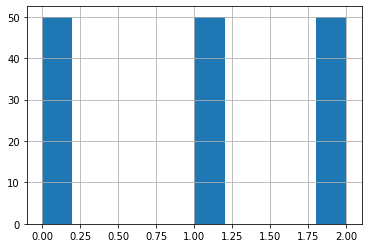

In [77]:
df['Species'].hist()

In [78]:
X = df.drop('Species', axis=1).values
y = df['Species'].values

In [91]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

class LinearDiscriminantAnalysis:

    def __init__(self):
        self.priors = None
        self.means = None
        self.S = None

    def fit(self, X, y):
        # Count how many classes we're going to have to predict
        # Note: unique labels is of type [0, 1, ..., L] # TODO - Check
        unique_labels = np.unique(y)
        n_unique_labels = len(unique_labels)
        n_observations = len(y)

        # Now build all the priors in a special array
        priors = np.zeros(shape=n_unique_labels)
        # Now compute the mean mu for every class l in 0 ... L
        means = np.zeros(shape=(len(X[0]), n_unique_labels))
        idxs_cache = []

        for i, l in enumerate(unique_labels):
            idxs = np.where(y==l)
            idxs_cache.append(idxs[0])
            # Priors
            n_instances_class = len(y[idxs])
            priors[i] = n_instances_class / n_observations
            # Means
            means[:, i] = np.sum(X[idxs], axis=0) / n_instances_class

        # Get the indices where y is of a certain label
        # TODO - Optimize loops using Numba (just add a jit no-python decorator)
        const = 1 / (n_observations - n_unique_labels)
        S = np.zeros(shape=(len(X[0,:]), len(X[0,:])))
        for l in range(n_unique_labels):
            _idxs = idxs_cache[l]
            for i in _idxs:
                H = (X[i,:] - means[:, l])
                S += np.outer(H, H)
        S = const * S

        self.priors = priors
        self.means = means
        self.S = S

    def infer(self, x):
        # Compute a discriminant function over the classes
        deltas = np.zeros(shape=len(self.priors))
        S_inv = np.linalg.inv(self.S)
        for i in range(len(self.priors)):
            # Add x.T * S^-1 * mu_l
            delta_l = 0
            delta_l += x.T @ S_inv @ self.means[:, i]
            delta_l += (-0.5 * self.means[:, i]) @ S_inv @ self.means[:, i]
            delta_l += np.log(self.priors[i])
            deltas[i] = delta_l
        probs = softmax(deltas)
        return np.where(probs==max(probs))[0][0]


l = LinearDiscriminantAnalysis()

In [92]:
l.fit(X,y)

In [98]:

wrong = 0
right = 0

for i in range(30):
    r = np.random.randint(0, 150)
    x = df.iloc[r,:].values[:-1]
    true = df.iloc[r,:].values[-1]
    res = l.infer(x)
    if res == true:
        right += 1
    else:
        wrong += 1

In [99]:
print(f'Right: {right} and Wrong: {wrong}')

Right: 29 and Wrong: 1


In [107]:
# Now more interesting, find a bivariate input with bivariate output, and plot the decision boundaries

cov = np.array([
    [1,0],
    [0,1]
])

In [122]:
# Gaussian distribution n1
sample_1 = np.random.multivariate_normal(mean=np.array([1,2]), cov=cov, size=300)
y_1 = np.zeros(shape=len(sample_1[:, 0]))

In [123]:
sample_2 = np.random.multivariate_normal(mean=np.array([4,3]), cov=cov, size=300)
y_2 = np.ones(shape=len(sample_2[:,0]))



In [124]:
X = np.vstack((sample_1, sample_2))
y = np.hstack((y_1, y_2)).reshape(-1, 1)
y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [125]:
X_y=np.concatenate((X,y), axis=1)

In [127]:
np.random.shuffle(X_y)

In [129]:
l = LinearDiscriminantAnalysis()
l.fit(X_y[:, :-1], X_y[:, -1])

In [130]:
l.S.shape

(2, 2)

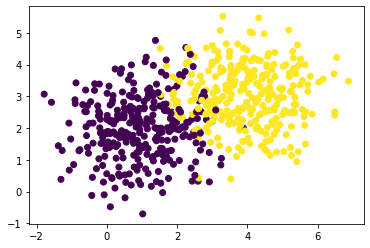

In [136]:
import matplotlib.pyplot as plt

# Let's look at the datapoints
plt.scatter(x= X_y[:, 0], y= X_y[:, 1], c=X_y[:, -1])


In [137]:
#On top of it plot the decision boundary created by the algorithm
sample_v = np.random.multivariate_normal(mean=np.array([3,3]), cov=cov, size=1500)
class_v = np.zeros(len(sample_v[:,0]))
for i in range(len(sample_v[:, 0])):
    class_v[i] = l.infer(sample_v[i, :])

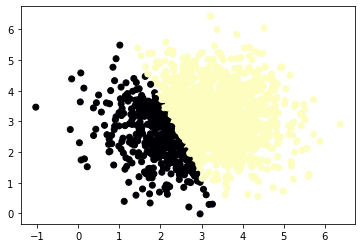

In [143]:
plt.scatter(x= sample_v[:, 0], y= sample_v[:, 1], c=class_v,cmap='magma')
